# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suppress Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: TOTAL_EXPENDITURE

How many years of data are logged in our dataset?
 

In [3]:
total_years = 0
previous_year = "1986"
dyears = df[df["STATE"] == "MICHIGAN"]
dyears = dyears["YEAR"] 
print(dyears)
for i in dyears:
    if(previous_year != i):
        total_years +=1
        previous_category = i

print("There are:", total_years, "years")

22      1992
73      1993
124     1994
175     1995
226     1996
277     1997
328     1998
379     1999
430     2000
481     2001
532     2002
583     2003
634     2004
685     2005
736     2006
787     2007
838     2008
889     2009
940     2010
991     2011
1042    2012
1093    2013
1144    2014
1195    2015
1246    2016
1429    1986
1430    1987
1431    1988
1432    1989
1433    1990
1434    1991
1435    2017
1685    2019
Name: YEAR, dtype: int64
There are: 33 years


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [4]:
dspendingMI = df[df["STATE"] == "MICHIGAN"]
dspendingMI = dspendingMI["TOTAL_EXPENDITURE"]

dspendingOH = df[df["STATE"] == "OHIO"]
dspendingOH = dspendingOH["TOTAL_EXPENDITURE"]

print("Ohio spent an average of", dspendingOH.sum()/34, "per year, while Michigan spent an average of", dspendingMI.sum()/34, "per year on education")

Ohio spent an average of 13070181.05882353 per year, while Michigan spent an average of 12519298.411764706 per year on education


Find the average for your outcome score across all states in 2019

In [5]:
dyear = df[df["YEAR"] == 2000]
print("Average spending per state in 2000 was", dyear["TOTAL_EXPENDITURE"].sum()/34, "(there was no data for 2019, so I chose an arbitrary year)")





Average spending per state in 2000 was 11358159.088235294 (there was no data for 2019, so I chose an arbitrary year)


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [6]:
state_list = df[df["YEAR"] == 1990]
state_list = state_list["STATE"]


for i in state_list:
    dspend = df[df["STATE"] == i]
    dspend = dspend["TOTAL_EXPENDITURE"]
    dspend.dropna(inplace = True)
    print("the most money", i, "ever spent in a year was", dspend.max())




the most money ALABAMA ever spent in a year was 7847387.0
the most money ALASKA ever spent in a year was 2968341.0
the most money ARIZONA ever spent in a year was 9581201.0
the most money ARKANSAS ever spent in a year was 5669431.0
the most money CALIFORNIA ever spent in a year was 85320133.0
the most money COLORADO ever spent in a year was 9878524.0
the most money CONNECTICUT ever spent in a year was 10826431.0
the most money DELAWARE ever spent in a year was 2041952.0
the most money DISTRICT_OF_COLUMBIA ever spent in a year was 1360942.0
the most money FLORIDA ever spent in a year was 31219589.0
the most money GEORGIA ever spent in a year was 19172087.0
the most money HAWAII ever spent in a year was 2733094.0
the most money IDAHO ever spent in a year was 2100980.0
the most money ILLINOIS ever spent in a year was 33037244.0
the most money INDIANA ever spent in a year was 11535287.0
the most money IOWA ever spent in a year was 6972412.0
the most money KANSAS ever spent in a year was 61

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [7]:
dv=df[(df["YEAR"] >= 1986) & (df["YEAR"] <= 1989)]
dv=df[(df["YEAR"] >= 1996) & (df["YEAR"] <= 1999)]
dv=df[(df["YEAR"] >= 2005) & (df["YEAR"] <= 2008)]
dv=df[(df["YEAR"] >= 2011) & (df["YEAR"] <= 2014)]

dv["ENROLL"] = dv["ENROLL"]*10
# dv.dropna(inplace = True)

Feature engineering justification: I took a three year period from each decade of the dataset so that the scatterplot wouldn't look so crowded, and I scaled the enroll values because, on average total expenditures are 10 times as large.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='ENROLL', ylabel='TOTAL_EXPENDITURE'>

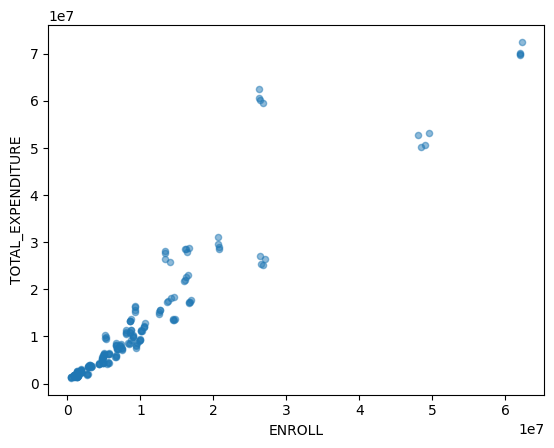

In [8]:
dv.plot.scatter(x="ENROLL", y = "TOTAL_EXPENDITURE", alpha = 0.5)

From this scatter plot we can see that the total enrollment has a clear relation to the total expenditure, although there are clear outliers

**Visualization 2**

<AxesSubplot: xlabel='TOTAL_REVENUE', ylabel='TOTAL_EXPENDITURE'>

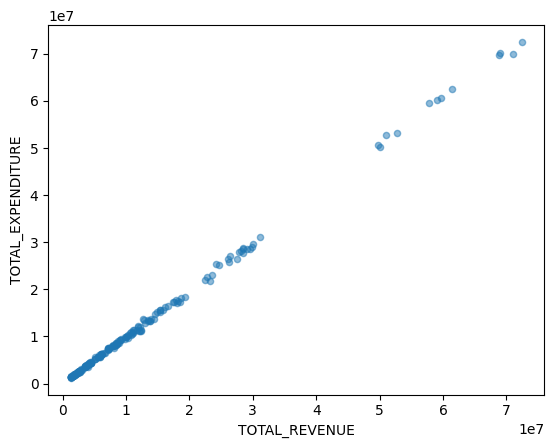

In [9]:
dv.plot.scatter(x="TOTAL_REVENUE", y = "TOTAL_EXPENDITURE", alpha = 0.5)

There appears to be a near perfect correlation between the total revenue that a state makes and its total expenditures

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df[["ENROLL","GRADES_ALL_G"]]
#using grades instead of total revenue because total revenue appeared to be too good of a predictor
y = df["TOTAL_EXPENDITURE"]
X.fillna(y.median(), inplace = True)
y.fillna(y.median(), inplace = True)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=1300)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [13]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [14]:
# create your model here
model = LinearRegression()

In [15]:
model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [17]:
print("R^2 value is:",model.score(X_test, y_test))
print("mean absolute error",np.abs(model.predict(X_test)-y_test))
print("root mean absolute error",np.mean((model.predict(X_test)-y_test)**2)**0.5)

R^2 value is: 0.3235334088789795
mean absolute error 1708    2.067198e+07
949     1.488827e+06
259     5.510296e+06
1604    1.461397e+05
62      3.575512e+06
            ...     
1646    2.067198e+07
25      1.639765e+06
343     2.221934e+06
1046    2.827576e+06
468     3.974565e+06
Name: TOTAL_EXPENDITURE, Length: 515, dtype: float64
root mean absolute error 9515397.885520099


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

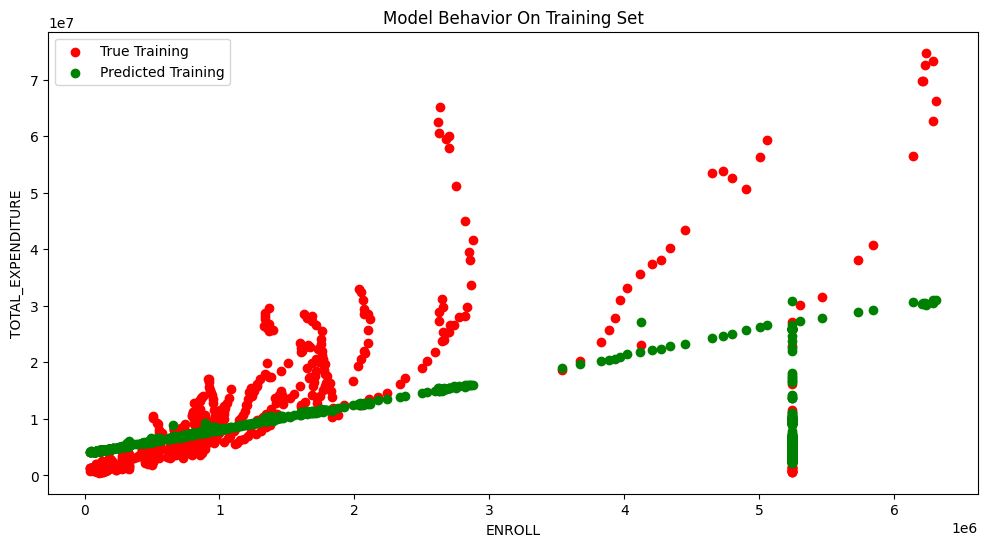

In [18]:
col_name = 'ENROLL'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('TOTAL_EXPENDITURE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

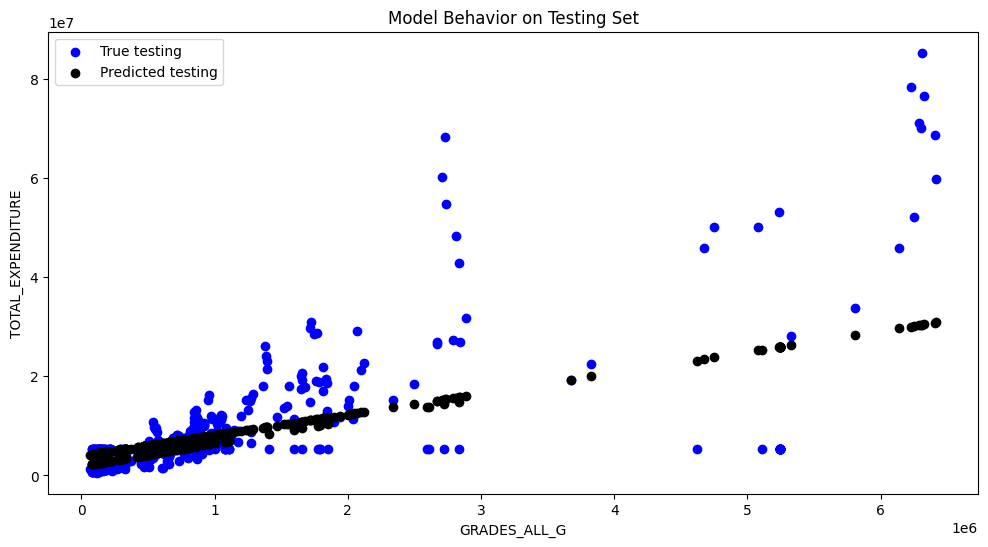

In [19]:
col_name = 'GRADES_ALL_G'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('TOTAL_EXPENDITURE')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

My model did a good job of finding the correct line to fit to the data in order to try to predict the trend. However, it doesn't seem possible to predict all of the variablility in the total expenditure data using total grades and enrollment under a linear fit, as we can see from the discrepencies between the predicted and actual values of the data. From these two graphs, it appears that grades are a better predictor of total expenditures of a state as compared to their total enrollment.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2ac09bc7-babf-4e89-b0d7-7fa4924569c9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>